In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# 경고 메시지 숨기기
warnings.filterwarnings("ignore")

In [126]:
df = pd.read_csv("./data/kkbox_data_not_log.csv")

In [127]:
df.head()

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
0,0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,0,0,870,3981,4130,0.0,1.0,20170428,0.033333,30
1,1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916,0,0,603,2980,3129,0.0,1.0,20170517,0.000000,21
2,2,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34,male,9,20110916,1,0,360,1072,1072,0.0,0.0,20170823,0.000000,2
3,3,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918,0,0,783,3874,4023,0.0,1.0,20170426,0.000000,27
4,4,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,0,NaN,7,20110918,1,0,780,3874,4023,0.0,1.0,20170427,0.000000,27


### 전처리 할 컬럼
1. `아이디별 평균 할인률 (5,6번 컬럼 이용)`
2. `is_auto_renew (자동 갱신 비율)`
3. `membership_expire_date(아이디별 가장 마지막 날짜)`
4. `is_cancle (비율)`
5. `거래 횟수 (아이디별 count)`

#### type 변환 (int -> Date)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961431 entries, 0 to 961430
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              961431 non-null  int64  
 1   msno                    961431 non-null  object 
 2   city                    961431 non-null  int64  
 3   bd                      961431 non-null  int64  
 4   gender                  442069 non-null  object 
 5   registered_via          961431 non-null  int64  
 6   registration_init_time  961431 non-null  int64  
 7   is_churn                961431 non-null  int64  
 8   is_back                 961431 non-null  int64  
 9   payment_plan_sum        961431 non-null  int64  
 10  plan_list_price         961431 non-null  int64  
 11  actual_amount_paid      961431 non-null  int64  
 12  discount_rate           960376 non-null  float64
 13  is_auto_renew           961431 non-null  float64
 14  membership_expire_da

In [129]:
df['membership_expire_date'].isnull().sum()

0

In [130]:
df["membership_expire_date"].unique()

array([20170428, 20170517, 20170823, ..., 20200424, 20190613, 20201117],
      dtype=int64)

* 타입 변환 함수 선언

In [131]:
def int_to_date(df):
    # 정수형을 문자열로 변환한 후 날짜 형식으로 변환하고, Pandas datetime64 형식으로 변환
    df['membership_expire_date'] = pd.to_datetime(df['membership_expire_date'].astype(str), format='%Y%m%d', errors='coerce')
    return df

In [132]:
int_to_date(df)
df["membership_expire_date"].unique()

<DatetimeArray>
['2017-04-28 00:00:00', '2017-05-17 00:00:00', '2017-08-23 00:00:00',
 '2017-04-26 00:00:00', '2017-04-27 00:00:00', '2017-04-02 00:00:00',
 '2017-05-31 00:00:00', '2017-04-10 00:00:00', '2017-04-03 00:00:00',
 '2017-04-30 00:00:00',
 ...
 '2018-12-27 00:00:00', '2019-01-03 00:00:00', '2018-12-21 00:00:00',
 '2019-05-31 00:00:00', '2020-05-29 00:00:00', '2021-10-15 00:00:00',
 '2020-02-22 00:00:00', '2020-04-24 00:00:00', '2019-06-13 00:00:00',
 '2020-11-17 00:00:00']
Length: 1096, dtype: datetime64[ns]

In [133]:
print(df['membership_expire_date'].dtype)

datetime64[ns]


#### 결측값 확인

In [134]:
df.isnull().sum()

Unnamed: 0                     0
msno                           0
city                           0
bd                             0
gender                    519362
registered_via                 0
registration_init_time         0
is_churn                       0
is_back                        0
payment_plan_sum               0
plan_list_price                0
actual_amount_paid             0
discount_rate               1055
is_auto_renew                  0
membership_expire_date         0
is_cancel                      0
transaction_count              0
dtype: int64

* `discount_rate`가 null값인 행을 확인

In [135]:
df['discount_rate'].unique()

array([ 0.        ,  0.04      ,  0.03703704,  0.06471716,  0.06969541,
        0.125     ,  0.05752637,  0.07142857,  0.05      ,  0.06896552,
        0.04166667,  0.04347826,  0.06666667,  0.05965697,  0.06195147,
        0.03571429,  0.03448276,  0.0625    ,  0.02301055,  0.0232318 ,
        0.02237136,  0.14285714,  0.0555427 ,  0.06711409,  0.03846154,
        0.03097574,  0.05420754,  0.02684564,  0.05263158,  0.05637584,
        0.03333333,  0.02157239,  0.01964315,  0.01388567,  0.25      ,
        0.00774393,         nan,  0.66666667,  0.4       ,  0.11111111,
        0.01118568,  0.08333333,  0.33333333,  0.16666667,  0.5       ,
        0.03221477,  0.0952381 ,  0.0519593 ,  0.0071908 ,  0.05219985,
        0.09090909,  0.03728561,  0.02982849,  0.04165702,  0.00671141,
        0.02876318,  0.07692308,  0.2       ,  0.04737465,  0.04881025,
        0.01548787,  0.03871967,  0.01342282,  0.01491424,  0.11764706,
        0.02666667,  0.04238785,  0.08      ,  0.04419709,  0.04

In [136]:
df[df['discount_rate'].isnull()]

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
745,745,diXulnMC4fEk+xt3oTNaVBlDju0wlmWrdwDqJVjyTmM=,1,0,NaN,4,20170102,1,0,10,0,0,NaN,0.0,2017-02-05,0.0,1
2430,2430,uWdL08M6hhfPFHVcecxZGjF+V59gJDDaVUmkuQc6mxI=,1,0,NaN,9,20170113,1,0,21,0,0,NaN,0.0,2017-02-03,0.0,1
2472,2472,VkWVCQmMqX5Cs45TaQlEXA6FFS3SzCd1EjoJCNLj3mY=,1,0,NaN,9,20170126,1,0,7,0,0,NaN,0.0,2017-02-02,0.0,1
2841,2841,MYEiUTHzGMZmdWazUoUR4+5z5bX4Qg+eBOGmG7p/pUM=,5,37,female,3,20170114,1,0,21,0,0,NaN,0.0,2017-02-07,0.0,1
2859,2859,U6sj6NtV3kznjizOsm8uQh3Wv8QwG3Zca0gNcSYWZjo=,6,23,female,4,20170121,1,0,7,0,0,NaN,0.0,2017-02-04,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955137,955137,oXmNzJiWXhu7q2FYaduvcHNW32aXIiMMzZU4Sn9de7I=,1,0,NaN,4,20170123,1,0,10,0,0,NaN,0.0,2017-02-05,0.0,1
956804,956804,HSEK1ebI+vPAPycQZe5BuHDX3KN27GH1iwlask6uaTU=,1,0,NaN,4,20160226,1,0,410,0,0,NaN,0.0,2017-04-11,0.0,41
957887,957887,rNgzq51bA2OFIT5naiNPV1OzQFo6w1GJoby4XcESNJo=,7,17,female,4,20161011,1,0,67,0,0,NaN,0.0,2017-03-25,0.0,2
959734,959734,Y6kf6MOLuJte348YnY5I8dgoFztdUzvOxxCRivxZ0uA=,1,20,female,3,20141006,1,0,247,0,0,NaN,0.0,2017-02-25,0.0,2


* `discount_rate`가 null값인 경우 `plan_list_price`와 `actual_amount_paid`이 0인 것으로 보임.
* `plan_list_price`와 `actual_amount_paid` 0이 아닌데도 `discount_rate` null값인 행을 확인해보자

In [137]:
filtered_df = df[(df["plan_list_price"] != 0) &
                 (df["actual_amount_paid"] != 0) &
                 (df["discount_rate"].isna())]
filtered_df.shape

(0, 17)

* `plan_list_price`와 `actual_amount_paid` 가 0이 아닐 때 `discount_rate`가 null인 행은 없다.
* 그럼 둘 중에 하나만 0일 때 `discount_rate`가 null인 행도 있는지 확인

In [138]:
filtered_df_plan = df[(df["plan_list_price"] != 0) &
                 (df["discount_rate"].isna())]
filtered_df_actual = df[(df["actual_amount_paid"] != 0) &
                 (df["discount_rate"].isna())]
filtered_df_plan.shape, filtered_df_actual.shape

((0, 17), (2, 17))

In [139]:
filtered_df_actual

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
449765,449765,iCezlEawq1v1sl+T0vMyfWAxOYFH4hjg2sIKoZ0HriE=,5,21,male,9,20130208,1,0,240,0,1788,NaN,0.0,2017-02-12,0.0,2
882370,882370,xyqBDFwKIJyRDLiTJXayQJiYd8KMjS92iRovzHEBbs8=,4,52,male,9,20141205,1,0,0,0,1788,NaN,0.0,2017-03-12,0.0,1


* `plan_list_price`은 0이지만 `actual_amount_paid`이 1788인 경우 `discount_rate`가 nan인 행이 2개 존재. => 모델이 정상적인 패턴이라고 학습할 위험이 있기 때문에 2행은 삭제
* 나머지 결측값은 0으로 대체

#### 결측값 처리 함수

In [140]:
def discount_rate_preprocessing(df):
    df.drop(df[(df["actual_amount_paid"] != 0) & df["discount_rate"].isna()].index, inplace=True)
    df["discount_rate"].fillna(0, inplace=True)
    return df

In [141]:
df = discount_rate_preprocessing(df)
df["discount_rate"].isnull().sum()

0

#### 이상치 확인
* `is_cancel`, `is_auto_renew`의 경우 0과 1의 값으로 이루어진 값들을 비율로 변환한 변수이기 때문에 이상치 처리를 따로 하지 않았다.
* 그리고 `transaction_count`의 경우도 사용자의 실제 거래 행 수를 count하여 생성한 변수이기 때문에 이상치 처리를 따로 하지 않았다.

In [142]:
def plot_outliers(df, columns):
    sns.set_style("whitegrid")
    fig, axes = plt.subplots(len(columns), 2, figsize=(14, len(columns) * 4))

    for i, col in enumerate(columns):
        # 수치형 컬럼에 대해서만 박스플롯과 히스토그램 그리기
        if pd.api.types.is_numeric_dtype(df[col]):
            sns.boxplot(x=df[col], ax=axes[i, 0], color="skyblue")
            axes[i, 0].set_title(f"{col} - Boxplot", fontsize=12)
            axes[i, 0].set_xlabel("")

            sns.histplot(df[col], bins=30, kde=True, color="salmon", ax=axes[i, 1])
            axes[i, 1].set_title(f"{col} - Histogram", fontsize=12)
            axes[i, 1].set_xlabel("")

    plt.tight_layout(pad=3)
    plt.show()

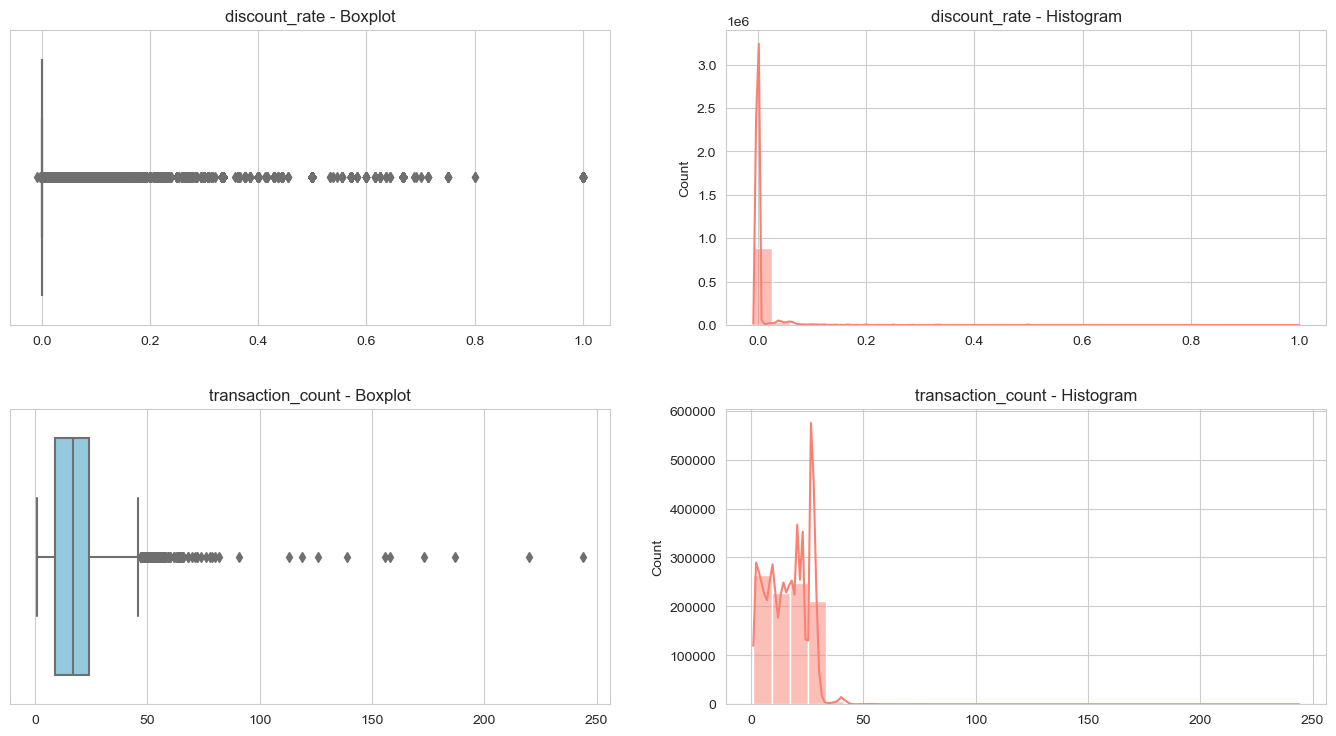

In [143]:
columns_to_check = ["discount_rate", "transaction_count"]
plot_outliers(df, columns_to_check)

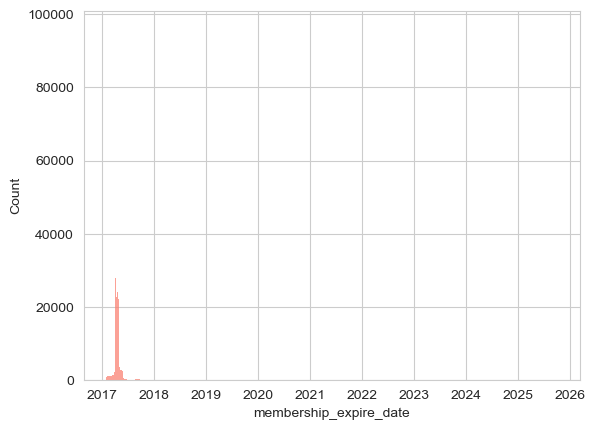

In [144]:
sns.histplot(df["membership_expire_date"], discrete=True, color="salmon")
plt.show()

#### membership_expire_date 이상치 처리

* `membership_expire_date`의 경우 `registration_init_time`보다 빠르다면 이상치로 판단해 제거
* 멤버십 만료일자가 KKBox 서비스 시작연도 이전이거나
데이터 공개시점인 2017년 3월 30일로부터 1년 1개월※이후인 경우는 제외
(최대 1년 단위 구독 가능 + 30일 무료 체험기간)

In [145]:
df['registration_init_time']

0         20110914
1         20110916
2         20110916
3         20110918
4         20110918
            ...   
961426    20151020
961427    20151020
961428    20151020
961429    20151020
961430    20151020
Name: registration_init_time, Length: 961429, dtype: int64

In [146]:
def int_to_date(df):
    # 정수형을 문자열로 변환한 후 날짜 형식으로 변환하고, Pandas datetime64 형식으로 변환
    df['registration_init_time'] = pd.to_datetime(df['registration_init_time'].astype(str), format='%Y%m%d', errors='coerce')
    return df

int_to_date(df)

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
0,0,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09-14,0,0,870,3981,4130,0.000000,1.0,2017-04-28,0.033333,30
1,1,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,2011-09-16,0,0,603,2980,3129,0.000000,1.0,2017-05-17,0.000000,21
2,2,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34,male,9,2011-09-16,1,0,360,1072,1072,0.000000,0.0,2017-08-23,0.000000,2
3,3,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,2011-09-18,0,0,783,3874,4023,0.000000,1.0,2017-04-26,0.000000,27
4,4,OoDwiKZM+ZGr9P3fRivavgOtglTEaNfWJO4KaJcTTts=,1,0,NaN,7,2011-09-18,1,0,780,3874,4023,0.000000,1.0,2017-04-27,0.000000,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961426,961426,dz8iQV2eZCBZo1DjKL7OifsiyzGf3xyMaCFDOJHVeyc=,1,0,NaN,7,2015-10-20,0,0,540,1782,1782,0.000000,1.0,2017-04-19,0.000000,18
961427,961427,OL6joplCKThE1pZD+AQDnj3kZiC45qzpndlDIRSyPQI=,1,0,NaN,7,2015-10-20,0,0,540,2682,2682,0.000000,1.0,2017-04-20,0.000000,18
961428,961428,O11rAa17ANM6DGMMVb9L2vwCQFv/S6SR3SDB1nGuOAc=,1,0,NaN,7,2015-10-20,0,0,540,1782,1782,0.000000,1.0,2017-04-20,0.000000,18
961429,961429,tyoRqQ72Y2oCcqvdaIxG8T0Hs9DZvuuM8IeTwhxtdBQ=,6,26,female,7,2015-10-20,0,0,570,2681,2532,0.052632,1.0,2017-04-08,0.052632,19


In [147]:
df[df['membership_expire_date'] <= df['registration_init_time']]

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count
794968,794968,lPdUGHJwCdAPu0IKa8qBZ4hEd5DhE5cQUhqH8n5zJig=,1,0,NaN,13,2017-04-24,0,0,60,258,258,0.0,1.0,2017-04-17,0.0,2


In [148]:
start_date = pd.to_datetime("2005-01-01")
end_date = pd.to_datetime("2018-04-30")

# membership_expire_date가 날짜 범위 밖에 있는 데이터를 필터링
out_of_range_dates = df[(df['membership_expire_date'] < start_date) | (df['membership_expire_date'] > end_date)]

out_of_range_dates.shape

(5092, 17)

In [149]:
def membership_expire_date_preprocessing(df):
    # membership_expire_date가 registration_init_time보다 빠른 행을 필터링
    df_cleaned = df[df['membership_expire_date'] >= df['registration_init_time']]

    start_date = pd.to_datetime("2005-01-01")
    end_date = pd.to_datetime("2018-04-30")

    # membership_expire_date가 날짜 범위 밖에 있는 데이터를 필터링
    df_cleaned = df_cleaned[(df_cleaned['membership_expire_date'] >= start_date) & (df_cleaned['membership_expire_date'] <= end_date)]
    return df_cleaned

In [150]:
df = membership_expire_date_preprocessing(df)
df.shape

(956336, 17)

#### 수치형 컬럼 이상치 처리

*  `discount_rate` 이상치 처리
    * 0에서 1사이를 벗어나는 값 제거

In [151]:
outliers_discount_rate = df[(df["discount_rate"] < 0) | (df["discount_rate"] > 1)]
outliers_discount_rate

,Unnamed: 0,msno,city,bd,gender,registered_via,registration_init_time,is_churn,is_back,payment_plan_sum,plan_list_price,actual_amount_paid,discount_rate,is_auto_renew,membership_expire_date,is_cancel,transaction_count


In [152]:
def remove_outliers_discount_rate(df):
    # discount_rate가 0보다 작거나 1보다 큰 이상치 제거
    df_cleaned = df[(df["discount_rate"] >= 0) & (df["discount_rate"] <= 1)]
    return df_cleaned

In [154]:
df = remove_outliers_discount_rate(df)

In [155]:
df.to_csv("kkbox_dain_preprocessing.csv", index=False)

### 전처리 함수 모음

In [156]:
def int_to_date(df):
    # 정수형을 문자열로 변환한 후 날짜 형식으로 변환하고, Pandas datetime64 형식으로 변환
    df['membership_expire_date'] = pd.to_datetime(df['membership_expire_date'].astype(str), format='%Y%m%d', errors='coerce')
    return df

In [157]:
def discount_rate_preprocessing(df):
    df.drop(df[(df["actual_amount_paid"] != 0) & df["discount_rate"].isna()].index, inplace=True)
    df["discount_rate"].fillna(0, inplace=True)
    return df

In [158]:
def membership_expire_date_preprocessing(df):
    # membership_expire_date가 registration_init_time보다 빠른 행을 필터링
    df_cleaned = df[df['membership_expire_date'] >= df['registration_init_time']]

    start_date = pd.to_datetime("2005-01-01")
    end_date = pd.to_datetime("2018-04-30")

    # membership_expire_date가 날짜 범위 밖에 있는 데이터를 필터링
    df_cleaned = df_cleaned[(df_cleaned['membership_expire_date'] >= start_date) & (df_cleaned['membership_expire_date'] <= end_date)]
    return df_cleaned

In [159]:
def remove_outliers_discount_rate(df):
    # discount_rate가 0보다 작거나 1보다 큰 이상치 제거
    df_cleaned = df[(df["discount_rate"] >= 0) & (df["discount_rate"] <= 1)]
    return df_cleaned